In [4]:
# list the available phenotypes
import os
os.environ['JASS_DATA'] = os.path.join(os.getcwd(),'..','data')
print(os.environ['JASS_DATA'])
from jass.models.phenotype import get_available_phenotypes
phenotype_ids_all = [p.id for p in get_available_phenotypes('../data/initTable.hdf5')]
print(phenotype_ids_all)


/home/hmenager/jass/benchmark_scripts/../data
['z_C4D_CHD', 'z_CARDIOGRAM_CHD', 'z_DIAGRAM_T2D', 'z_GABRIEL_ASTHMA', 'z_GEFOS_BMD-FOREARM', 'z_GEFOS_BMD-NECK', 'z_GEFOS_BMD-SPINE', 'z_GIANT_BMI', 'z_GIANT_HEIGHT', 'z_GIANT_HIP', 'z_GIANT_WC', 'z_GIANT_WHR', 'z_GLG_HDL', 'z_GLG_LDL', 'z_GLG_TC', 'z_GLG_TG', 'z_ICBP_DBP', 'z_ICBP_MAP', 'z_ICBP_PP', 'z_ICBP_SBP', 'z_IGAP_AZ', 'z_IGGC_IOP', 'z_IIBDGC_CD', 'z_IIBDGC_IBD', 'z_IIBDGC_UC', 'z_IMSGC_MS', 'z_KIDNEY_CKD', 'z_KIDNEY_EGFR-CREA', 'z_KIDNEY_EGFR-CYS', 'z_MAGIC_2HGLU-ADJBMI', 'z_MAGIC_FAST-GLUCOSE', 'z_MAGIC_FAST-INSULIN', 'z_MAGIC_FPI', 'z_MAGIC_HBA1C', 'z_MAGIC_HOMA-B', 'z_MAGIC_HOMA-IR', 'z_MAGIC_IS', 'z_NEIGHBORHOOD_POAG', 'z_PGC_BIP', 'z_PGC_MDD', 'z_PGC_SCZ', 'z_RA_RA', 'z_SSGAC_COLLEGE', 'z_SSGAC_EDUYEAR']


In [6]:
# run the joint analysis on "insulin" phenotype ids, and store the memory and memory comsumptions
import datetime
import functools
import timeit
import tracemalloc
import os

from jass.models.worktable import create_worktable_file

phenotype_ids = {}

phenotype_ids['only_one'] = ["z_MAGIC_HOMA-IR"]
phenotype_ids['insulin'] = ["z_MAGIC_HOMA-IR","z_MAGIC_FAST-INSULIN","z_MAGIC_IS","z_MAGIC_FPI"]
#phenotype_ids['half'] = phenotype_ids_all[:len(phenotype_ids_all)//2]
#phenotype_ids['all'] = phenotype_ids_all

wt_path = "/tmp/test" + datetime.datetime.now().strftime('%Y-%m-%dT%H:%M:%S')

def create_worktable_test_fn(phenotypes_selection, chunk_size):
    wt_path = "/tmp/test" + datetime.datetime.now().strftime('%Y-%m-%dT%H:%M:%S')
    create_worktable_file(
        phenotypes_selection,
        "../data/initTable.hdf5",
        wt_path,
        False,
        chunk_size=chunk_size
        )
    os.remove(wt_path)
    
    
time_performances = {}
memory_peaks = {}
performances = {}
for key, phenotypes_selection in phenotype_ids.items():
    performances[key] = {'time':{},'memory':{}}
    for chunk_size in [2000,1500,1000,500,400,300,200,100,50,10,1]:
        tracemalloc.start()
        performances[key]['time'][chunk_size] = timeit.timeit(functools.partial(create_worktable_test_fn,phenotypes_selection, chunk_size), number=1)
        current, peak =  tracemalloc.get_traced_memory()
        performances[key]['memory'][chunk_size] = peak
        tracemalloc.stop()

Regions 0 to 2000
Number of pattern 1
Covering 1.0/1 of snps 
1801749 SNPs treated on 1801749 SNPs
Regions 0 to 1500
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1500 to 3000
Number of pattern 1
Covering 1.0/1 of snps 
1801749 SNPs treated on 1801749 SNPs
Regions 0 to 1000
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1000 to 2000
Number of pattern 1
Covering 1.0/1 of snps 
1801749 SNPs treated on 1801749 SNPs
Regions 0 to 500
Number of pattern 1
Covering 1.0/1 of snps 
Regions 500 to 1000
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1000 to 1500
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1500 to 2000
Number of pattern 1
Covering 1.0/1 of snps 
1801749 SNPs treated on 1801749 SNPs
Regions 0 to 400
Number of pattern 1
Covering 1.0/1 of snps 
Regions 400 to 800
Number of pattern 1
Covering 1.0/1 of snps 
Regions 800 to 1200
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1200 to 1600
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1600 to 2000
Number 

Regions 430 to 440
Number of pattern 1
Covering 1.0/1 of snps 
Regions 440 to 450
Number of pattern 1
Covering 1.0/1 of snps 
Regions 450 to 460
Number of pattern 1
Covering 1.0/1 of snps 
Regions 460 to 470
Number of pattern 1
Covering 1.0/1 of snps 
Regions 470 to 480
Number of pattern 1
Covering 1.0/1 of snps 
Regions 480 to 490
Number of pattern 1
Covering 1.0/1 of snps 
Regions 490 to 500
Number of pattern 1
Covering 1.0/1 of snps 
Regions 500 to 510
Number of pattern 1
Covering 1.0/1 of snps 
Regions 510 to 520
Number of pattern 1
Covering 1.0/1 of snps 
Regions 520 to 530
Number of pattern 1
Covering 1.0/1 of snps 
Regions 530 to 540
Number of pattern 1
Covering 1.0/1 of snps 
Regions 540 to 550
Number of pattern 1
Covering 1.0/1 of snps 
Regions 550 to 560
Number of pattern 1
Covering 1.0/1 of snps 
Regions 560 to 570
Number of pattern 1
Covering 1.0/1 of snps 
Regions 570 to 580
Number of pattern 1
Covering 1.0/1 of snps 
Regions 580 to 590
Number of pattern 1
Covering 1.0/1 o

1801749 SNPs treated on 1801749 SNPs
Regions 0 to 1
No data available for region 0 to region 1
Regions 1 to 2
Number of pattern 1
Covering 1.0/1 of snps 
Regions 2 to 3
Number of pattern 1
Covering 1.0/1 of snps 
Regions 3 to 4
Number of pattern 1
Covering 1.0/1 of snps 
Regions 4 to 5
Number of pattern 1
Covering 1.0/1 of snps 
Regions 5 to 6
Number of pattern 1
Covering 1.0/1 of snps 
Regions 6 to 7
Number of pattern 1
Covering 1.0/1 of snps 
Regions 7 to 8
Number of pattern 1
Covering 1.0/1 of snps 
Regions 8 to 9
Number of pattern 1
Covering 1.0/1 of snps 
Regions 9 to 10
Number of pattern 1
Covering 1.0/1 of snps 
Regions 10 to 11
Number of pattern 1
Covering 1.0/1 of snps 
Regions 11 to 12
Number of pattern 1
Covering 1.0/1 of snps 
Regions 12 to 13
Number of pattern 1
Covering 1.0/1 of snps 
Regions 13 to 14
Number of pattern 1
Covering 1.0/1 of snps 
Regions 14 to 15
Number of pattern 1
Covering 1.0/1 of snps 
Regions 15 to 16
Number of pattern 1
Covering 1.0/1 of snps 
Regions

Regions 133 to 134
Number of pattern 1
Covering 1.0/1 of snps 
Regions 134 to 135
Number of pattern 1
Covering 1.0/1 of snps 
Regions 135 to 136
Number of pattern 1
Covering 1.0/1 of snps 
Regions 136 to 137
Number of pattern 1
Covering 1.0/1 of snps 
Regions 137 to 138
Number of pattern 1
Covering 1.0/1 of snps 
Regions 138 to 139
Number of pattern 1
Covering 1.0/1 of snps 
Regions 139 to 140
Number of pattern 1
Covering 1.0/1 of snps 
Regions 140 to 141
Number of pattern 1
Covering 1.0/1 of snps 
Regions 141 to 142
Number of pattern 1
Covering 1.0/1 of snps 
Regions 142 to 143
Number of pattern 1
Covering 1.0/1 of snps 
Regions 143 to 144
Number of pattern 1
Covering 1.0/1 of snps 
Regions 144 to 145
Number of pattern 1
Covering 1.0/1 of snps 
Regions 145 to 146
Number of pattern 1
Covering 1.0/1 of snps 
Regions 146 to 147
Number of pattern 1
Covering 1.0/1 of snps 
Regions 147 to 148
Number of pattern 1
Covering 1.0/1 of snps 
Regions 148 to 149
Number of pattern 1
Covering 1.0/1 o

Regions 264 to 265
Number of pattern 1
Covering 1.0/1 of snps 
Regions 265 to 266
Number of pattern 1
Covering 1.0/1 of snps 
Regions 266 to 267
Number of pattern 1
Covering 1.0/1 of snps 
Regions 267 to 268
Number of pattern 1
Covering 1.0/1 of snps 
Regions 268 to 269
Number of pattern 1
Covering 1.0/1 of snps 
Regions 269 to 270
Number of pattern 1
Covering 1.0/1 of snps 
Regions 270 to 271
Number of pattern 1
Covering 1.0/1 of snps 
Regions 271 to 272
Number of pattern 1
Covering 1.0/1 of snps 
Regions 272 to 273
Number of pattern 1
Covering 1.0/1 of snps 
Regions 273 to 274
Number of pattern 1
Covering 1.0/1 of snps 
Regions 274 to 275
Number of pattern 1
Covering 1.0/1 of snps 
Regions 275 to 276
Number of pattern 1
Covering 1.0/1 of snps 
Regions 276 to 277
Number of pattern 1
Covering 1.0/1 of snps 
Regions 277 to 278
Number of pattern 1
Covering 1.0/1 of snps 
Regions 278 to 279
Number of pattern 1
Covering 1.0/1 of snps 
Regions 279 to 280
Number of pattern 1
Covering 1.0/1 o

Regions 395 to 396
Number of pattern 1
Covering 1.0/1 of snps 
Regions 396 to 397
Number of pattern 1
Covering 1.0/1 of snps 
Regions 397 to 398
Number of pattern 1
Covering 1.0/1 of snps 
Regions 398 to 399
Number of pattern 1
Covering 1.0/1 of snps 
Regions 399 to 400
Number of pattern 1
Covering 1.0/1 of snps 
Regions 400 to 401
Number of pattern 1
Covering 1.0/1 of snps 
Regions 401 to 402
Number of pattern 1
Covering 1.0/1 of snps 
Regions 402 to 403
Number of pattern 1
Covering 1.0/1 of snps 
Regions 403 to 404
Number of pattern 1
Covering 1.0/1 of snps 
Regions 404 to 405
Number of pattern 1
Covering 1.0/1 of snps 
Regions 405 to 406
Number of pattern 1
Covering 1.0/1 of snps 
Regions 406 to 407
Number of pattern 1
Covering 1.0/1 of snps 
Regions 407 to 408
Number of pattern 1
Covering 1.0/1 of snps 
Regions 408 to 409
Number of pattern 1
Covering 1.0/1 of snps 
Regions 409 to 410
Number of pattern 1
Covering 1.0/1 of snps 
Regions 410 to 411
Number of pattern 1
Covering 1.0/1 o

Regions 526 to 527
Number of pattern 1
Covering 1.0/1 of snps 
Regions 527 to 528
Number of pattern 1
Covering 1.0/1 of snps 
Regions 528 to 529
Number of pattern 1
Covering 1.0/1 of snps 
Regions 529 to 530
Number of pattern 1
Covering 1.0/1 of snps 
Regions 530 to 531
Number of pattern 1
Covering 1.0/1 of snps 
Regions 531 to 532
Number of pattern 1
Covering 1.0/1 of snps 
Regions 532 to 533
Number of pattern 1
Covering 1.0/1 of snps 
Regions 533 to 534
Number of pattern 1
Covering 1.0/1 of snps 
Regions 534 to 535
Number of pattern 1
Covering 1.0/1 of snps 
Regions 535 to 536
Number of pattern 1
Covering 1.0/1 of snps 
Regions 536 to 537
Number of pattern 1
Covering 1.0/1 of snps 
Regions 537 to 538
Number of pattern 1
Covering 1.0/1 of snps 
Regions 538 to 539
Number of pattern 1
Covering 1.0/1 of snps 
Regions 539 to 540
Number of pattern 1
Covering 1.0/1 of snps 
Regions 540 to 541
Number of pattern 1
Covering 1.0/1 of snps 
Regions 541 to 542
Number of pattern 1
Covering 1.0/1 o

Regions 657 to 658
Number of pattern 1
Covering 1.0/1 of snps 
Regions 658 to 659
Number of pattern 1
Covering 1.0/1 of snps 
Regions 659 to 660
Number of pattern 1
Covering 1.0/1 of snps 
Regions 660 to 661
Number of pattern 1
Covering 1.0/1 of snps 
Regions 661 to 662
Number of pattern 1
Covering 1.0/1 of snps 
Regions 662 to 663
Number of pattern 1
Covering 1.0/1 of snps 
Regions 663 to 664
Number of pattern 1
Covering 1.0/1 of snps 
Regions 664 to 665
Number of pattern 1
Covering 1.0/1 of snps 
Regions 665 to 666
Number of pattern 1
Covering 1.0/1 of snps 
Regions 666 to 667
Number of pattern 1
Covering 1.0/1 of snps 
Regions 667 to 668
Number of pattern 1
Covering 1.0/1 of snps 
Regions 668 to 669
Number of pattern 1
Covering 1.0/1 of snps 
Regions 669 to 670
Number of pattern 1
Covering 1.0/1 of snps 
Regions 670 to 671
Number of pattern 1
Covering 1.0/1 of snps 
Regions 671 to 672
Number of pattern 1
Covering 1.0/1 of snps 
Regions 672 to 673
Number of pattern 1
Covering 1.0/1 o

Regions 788 to 789
Number of pattern 1
Covering 1.0/1 of snps 
Regions 789 to 790
Number of pattern 1
Covering 1.0/1 of snps 
Regions 790 to 791
Number of pattern 1
Covering 1.0/1 of snps 
Regions 791 to 792
Number of pattern 1
Covering 1.0/1 of snps 
Regions 792 to 793
Number of pattern 1
Covering 1.0/1 of snps 
Regions 793 to 794
Number of pattern 1
Covering 1.0/1 of snps 
Regions 794 to 795
Number of pattern 1
Covering 1.0/1 of snps 
Regions 795 to 796
Number of pattern 1
Covering 1.0/1 of snps 
Regions 796 to 797
Number of pattern 1
Covering 1.0/1 of snps 
Regions 797 to 798
Number of pattern 1
Covering 1.0/1 of snps 
Regions 798 to 799
Number of pattern 1
Covering 1.0/1 of snps 
Regions 799 to 800
Number of pattern 1
Covering 1.0/1 of snps 
Regions 800 to 801
Number of pattern 1
Covering 1.0/1 of snps 
Regions 801 to 802
Number of pattern 1
Covering 1.0/1 of snps 
Regions 802 to 803
Number of pattern 1
Covering 1.0/1 of snps 
Regions 803 to 804
Number of pattern 1
Covering 1.0/1 o

Regions 919 to 920
Number of pattern 1
Covering 1.0/1 of snps 
Regions 920 to 921
Number of pattern 1
Covering 1.0/1 of snps 
Regions 921 to 922
Number of pattern 1
Covering 1.0/1 of snps 
Regions 922 to 923
Number of pattern 1
Covering 1.0/1 of snps 
Regions 923 to 924
Number of pattern 1
Covering 1.0/1 of snps 
Regions 924 to 925
Number of pattern 1
Covering 1.0/1 of snps 
Regions 925 to 926
Number of pattern 1
Covering 1.0/1 of snps 
Regions 926 to 927
Number of pattern 1
Covering 1.0/1 of snps 
Regions 927 to 928
Number of pattern 1
Covering 1.0/1 of snps 
Regions 928 to 929
Number of pattern 1
Covering 1.0/1 of snps 
Regions 929 to 930
Number of pattern 1
Covering 1.0/1 of snps 
Regions 930 to 931
Number of pattern 1
Covering 1.0/1 of snps 
Regions 931 to 932
Number of pattern 1
Covering 1.0/1 of snps 
Regions 932 to 933
Number of pattern 1
Covering 1.0/1 of snps 
Regions 933 to 934
Number of pattern 1
Covering 1.0/1 of snps 
Regions 934 to 935
Number of pattern 1
Covering 1.0/1 o

Regions 1048 to 1049
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1049 to 1050
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1050 to 1051
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1051 to 1052
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1052 to 1053
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1053 to 1054
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1054 to 1055
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1055 to 1056
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1056 to 1057
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1057 to 1058
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1058 to 1059
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1059 to 1060
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1060 to 1061
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1061 to 1062
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1062 to 1063
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1063 to 1064
Numb

Regions 1175 to 1176
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1176 to 1177
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1177 to 1178
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1178 to 1179
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1179 to 1180
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1180 to 1181
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1181 to 1182
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1182 to 1183
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1183 to 1184
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1184 to 1185
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1185 to 1186
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1186 to 1187
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1187 to 1188
No data available for region 1187 to region 1188
Regions 1188 to 1189
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1189 to 1190
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1190 to 1191

Regions 1301 to 1302
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1302 to 1303
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1303 to 1304
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1304 to 1305
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1305 to 1306
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1306 to 1307
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1307 to 1308
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1308 to 1309
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1309 to 1310
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1310 to 1311
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1311 to 1312
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1312 to 1313
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1313 to 1314
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1314 to 1315
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1315 to 1316
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1316 to 1317
Numb

Regions 1428 to 1429
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1429 to 1430
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1430 to 1431
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1431 to 1432
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1432 to 1433
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1433 to 1434
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1434 to 1435
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1435 to 1436
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1436 to 1437
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1437 to 1438
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1438 to 1439
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1439 to 1440
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1440 to 1441
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1441 to 1442
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1442 to 1443
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1443 to 1444
Numb

Regions 1555 to 1556
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1556 to 1557
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1557 to 1558
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1558 to 1559
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1559 to 1560
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1560 to 1561
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1561 to 1562
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1562 to 1563
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1563 to 1564
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1564 to 1565
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1565 to 1566
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1566 to 1567
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1567 to 1568
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1568 to 1569
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1569 to 1570
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1570 to 1571
Numb

Regions 1682 to 1683
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1683 to 1684
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1684 to 1685
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1685 to 1686
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1686 to 1687
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1687 to 1688
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1688 to 1689
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1689 to 1690
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1690 to 1691
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1691 to 1692
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1692 to 1693
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1693 to 1694
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1694 to 1695
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1695 to 1696
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1696 to 1697
Number of pattern 1
Covering 1.0/1 of snps 
Regions 1697 to 1698
Numb

Regions 1700 to 1750
Number of pattern 6
Covering 0.9600774255988388/1 of snps 
1967015 SNPs treated on 1880476 SNPs
Regions 0 to 10
Number of pattern 6
Covering 0.9592226823829245/1 of snps 
Regions 10 to 20
Number of pattern 5
Covering 0.9506227267717403/1 of snps 
Regions 20 to 30
Number of pattern 5
Covering 0.9552238805970149/1 of snps 
Regions 30 to 40
Number of pattern 5
Covering 0.951924048075952/1 of snps 
Regions 40 to 50
Number of pattern 5
Covering 0.9614279557534838/1 of snps 
Regions 50 to 60
Number of pattern 5
Covering 0.9591921198576278/1 of snps 
Regions 60 to 70
Number of pattern 5
Covering 0.963672793797369/1 of snps 
Regions 70 to 80
Number of pattern 5
Covering 0.9543866858434353/1 of snps 
Regions 80 to 90
Number of pattern 5
Covering 0.9591823574929069/1 of snps 
Regions 90 to 100
Number of pattern 4
Covering 0.9547543581616482/1 of snps 
Regions 100 to 110
Number of pattern 5
Covering 0.9565027513319941/1 of snps 
Regions 110 to 120
Number of pattern 5
Covering

Regions 1040 to 1050
Number of pattern 5
Covering 0.9616102181400688/1 of snps 
Regions 1050 to 1060
Number of pattern 5
Covering 0.955256231614801/1 of snps 
Regions 1060 to 1070
Number of pattern 5
Covering 0.9606158252774794/1 of snps 
Regions 1070 to 1080
Number of pattern 4
Covering 0.9528567974856957/1 of snps 
Regions 1080 to 1090
Number of pattern 6
Covering 0.9672943508424182/1 of snps 
Regions 1090 to 1100
Number of pattern 6
Covering 0.9589668615984406/1 of snps 
Regions 1100 to 1110
Number of pattern 5
Covering 0.9561396747090111/1 of snps 
Regions 1110 to 1120
Number of pattern 5
Covering 0.960597232337946/1 of snps 
Regions 1120 to 1130
Number of pattern 5
Covering 0.960665334094803/1 of snps 
Regions 1130 to 1140
Number of pattern 6
Covering 0.9632971088784089/1 of snps 
Regions 1140 to 1150
Number of pattern 5
Covering 0.9632766125840918/1 of snps 
Regions 1150 to 1160
Number of pattern 5
Covering 0.9602675372243014/1 of snps 
Regions 1160 to 1170
Number of pattern 5
Co

Regions 38 to 39
Number of pattern 6
Covering 0.9616346955796499/1 of snps 
Regions 39 to 40
Number of pattern 6
Covering 0.9570230607966458/1 of snps 
Regions 40 to 41
Number of pattern 4
Covering 0.9604989604989604/1 of snps 
Regions 41 to 42
Number of pattern 4
Covering 0.9583858764186635/1 of snps 
Regions 42 to 43
Number of pattern 4
Covering 0.9602194787379972/1 of snps 
Regions 43 to 44
Number of pattern 5
Covering 0.9644171779141104/1 of snps 
Regions 44 to 45
Number of pattern 5
Covering 0.9575871819038642/1 of snps 
Regions 45 to 46
Number of pattern 5
Covering 0.9680851063829788/1 of snps 
Regions 46 to 47
Number of pattern 5
Covering 0.9625550660792951/1 of snps 
Regions 47 to 48
Number of pattern 4
Covering 0.9567307692307693/1 of snps 
Regions 48 to 49
Number of pattern 5
Covering 0.9587998208687865/1 of snps 
Regions 49 to 50
Number of pattern 4
Covering 0.9517241379310345/1 of snps 
Regions 50 to 51
Number of pattern 5
Covering 0.9648197009674582/1 of snps 
Regions 51 t

Regions 145 to 146
Number of pattern 5
Covering 0.9582111436950146/1 of snps 
Regions 146 to 147
Number of pattern 6
Covering 0.9535192563081007/1 of snps 
Regions 147 to 148
Number of pattern 4
Covering 0.9612831858407079/1 of snps 
Regions 148 to 149
Number of pattern 4
Covering 0.9526270456503014/1 of snps 
Regions 149 to 150
Number of pattern 3
Covering 0.9672330097087379/1 of snps 
Regions 150 to 151
Number of pattern 4
Covering 0.9508547008547008/1 of snps 
Regions 151 to 152
Number of pattern 6
Covering 0.9579554822753503/1 of snps 
Regions 152 to 153
Number of pattern 6
Covering 0.9513651877133106/1 of snps 
Regions 153 to 154
Number of pattern 4
Covering 0.9596069868995634/1 of snps 
Regions 154 to 155
Number of pattern 5
Covering 0.9631384939441812/1 of snps 
Regions 155 to 156
Number of pattern 5
Covering 0.9620653319283455/1 of snps 
Regions 156 to 157
Number of pattern 5
Covering 0.95676500508647/1 of snps 
Regions 157 to 158
Number of pattern 6
Covering 0.9567642956764295

Regions 251 to 252
Number of pattern 5
Covering 0.9561994609164419/1 of snps 
Regions 252 to 253
Number of pattern 4
Covering 0.9549248747913187/1 of snps 
Regions 253 to 254
Number of pattern 5
Covering 0.965016501650165/1 of snps 
Regions 254 to 255
Number of pattern 5
Covering 0.9640287769784174/1 of snps 
Regions 255 to 256
Number of pattern 5
Covering 0.9616013071895424/1 of snps 
Regions 256 to 257
Number of pattern 4
Covering 0.9595238095238094/1 of snps 
Regions 257 to 258
Number of pattern 4
Covering 0.9562467053241961/1 of snps 
Regions 258 to 259
Number of pattern 5
Covering 0.9579560155239328/1 of snps 
Regions 259 to 260
Number of pattern 5
Covering 0.9553415061295972/1 of snps 
Regions 260 to 261
Number of pattern 5
Covering 0.9529860228716646/1 of snps 
Regions 261 to 262
Number of pattern 5
Covering 0.9700176366843032/1 of snps 
Regions 262 to 263
Number of pattern 6
Covering 0.9580777096114519/1 of snps 
Regions 263 to 264
Number of pattern 4
Covering 0.950181629475869

Regions 357 to 358
Number of pattern 4
Covering 0.9675615212527965/1 of snps 
Regions 358 to 359
Number of pattern 5
Covering 0.9625935162094761/1 of snps 
Regions 359 to 360
Number of pattern 5
Covering 0.9669347631814119/1 of snps 
Regions 360 to 361
Number of pattern 5
Covering 0.9607843137254902/1 of snps 
Regions 361 to 362
Number of pattern 3
Covering 0.9743315508021391/1 of snps 
Regions 362 to 363
Number of pattern 5
Covering 0.9651162790697675/1 of snps 
Regions 363 to 364
Number of pattern 4
Covering 0.9524312896405921/1 of snps 
Regions 364 to 365
Number of pattern 5
Covering 0.9583710407239819/1 of snps 
Regions 365 to 366
Number of pattern 6
Covering 0.966386554621849/1 of snps 
Regions 366 to 367
Number of pattern 3
Covering 0.953405017921147/1 of snps 
Regions 367 to 368
Number of pattern 3
Covering 0.9718446601941748/1 of snps 
Regions 368 to 369
Number of pattern 6
Covering 0.9684282772820865/1 of snps 
Regions 369 to 370
Number of pattern 5
Covering 0.970828471411902/

Regions 463 to 464
Number of pattern 4
Covering 0.9569805194805194/1 of snps 
Regions 464 to 465
Number of pattern 5
Covering 0.9628378378378379/1 of snps 
Regions 465 to 466
Number of pattern 5
Covering 0.9642492339121552/1 of snps 
Regions 466 to 467
Number of pattern 4
Covering 0.9568868980963046/1 of snps 
Regions 467 to 468
Number of pattern 5
Covering 0.9628975265017669/1 of snps 
Regions 468 to 469
Number of pattern 4
Covering 0.9637096774193548/1 of snps 
Regions 469 to 470
Number of pattern 4
Covering 0.9564102564102563/1 of snps 
Regions 470 to 471
Number of pattern 5
Covering 0.9564943253467845/1 of snps 
Regions 471 to 472
Number of pattern 5
Covering 0.9578742709008425/1 of snps 
Regions 472 to 473
Number of pattern 4
Covering 0.9589041095890412/1 of snps 
Regions 473 to 474
Number of pattern 3
Covering 0.9584541062801932/1 of snps 
Regions 474 to 475
Number of pattern 5
Covering 0.9521367521367522/1 of snps 
Regions 475 to 476
Number of pattern 4
Covering 0.96045694200351

Regions 569 to 570
Number of pattern 5
Covering 0.9674134419551934/1 of snps 
Regions 570 to 571
Number of pattern 5
Covering 0.9617723718505647/1 of snps 
Regions 571 to 572
Number of pattern 5
Covering 0.9691629955947136/1 of snps 
Regions 572 to 573
Number of pattern 4
Covering 0.9597560975609757/1 of snps 
Regions 573 to 574
Number of pattern 4
Covering 0.9595202398800601/1 of snps 
Regions 574 to 575
Number of pattern 5
Covering 0.9562899786780383/1 of snps 
Regions 575 to 576
Number of pattern 3
Covering 0.9588652482269504/1 of snps 
Regions 576 to 577
Number of pattern 5
Covering 0.955456570155902/1 of snps 
Regions 577 to 578
Number of pattern 5
Covering 0.9621621621621622/1 of snps 
Regions 578 to 579
Number of pattern 5
Covering 0.9506416584402764/1 of snps 
Regions 579 to 580
Number of pattern 3
Covering 0.9588728103579589/1 of snps 
Regions 580 to 581
Number of pattern 3
Covering 0.9511599511599511/1 of snps 
Regions 581 to 582
Number of pattern 5
Covering 0.962871287128712

Regions 675 to 676
Number of pattern 3
Covering 0.9594180704441042/1 of snps 
Regions 676 to 677
Number of pattern 3
Covering 0.952925353059852/1 of snps 
Regions 677 to 678
Number of pattern 5
Covering 0.9632631010264721/1 of snps 
Regions 678 to 679
Number of pattern 4
Covering 0.9559023066485752/1 of snps 
Regions 679 to 680
Number of pattern 5
Covering 0.9685039370078738/1 of snps 
Regions 680 to 681
Number of pattern 4
Covering 0.9606962380685008/1 of snps 
Regions 681 to 682
Number of pattern 4
Covering 0.9587128111718275/1 of snps 
Regions 682 to 683
Number of pattern 5
Covering 0.9540311173974538/1 of snps 
Regions 683 to 684
Number of pattern 4
Covering 0.9551451187335092/1 of snps 
Regions 684 to 685
Number of pattern 6
Covering 0.9637730690362267/1 of snps 
Regions 685 to 686
Number of pattern 5
Covering 0.9671532846715328/1 of snps 
Regions 686 to 687
Number of pattern 3
Covering 0.9534482758620689/1 of snps 
Regions 687 to 688
Number of pattern 4
Covering 0.958510638297872

Regions 781 to 782
Number of pattern 4
Covering 0.9545014520813166/1 of snps 
Regions 782 to 783
Number of pattern 4
Covering 0.9661016949152542/1 of snps 
Regions 783 to 784
Number of pattern 4
Covering 0.9533011272141707/1 of snps 
Regions 784 to 785
Number of pattern 4
Covering 0.9638009049773756/1 of snps 
Regions 785 to 786
Number of pattern 4
Covering 0.9516129032258063/1 of snps 
Regions 786 to 787
Number of pattern 3
Covering 0.9786276715410575/1 of snps 
Regions 787 to 788
Number of pattern 5
Covering 0.9588785046728971/1 of snps 
Regions 788 to 789
Number of pattern 5
Covering 0.9609929078014184/1 of snps 
Regions 789 to 790
Number of pattern 5
Covering 0.9597130242825607/1 of snps 
Regions 790 to 791
Number of pattern 5
Covering 0.9641025641025642/1 of snps 
Regions 791 to 792
Number of pattern 6
Covering 0.9506172839506171/1 of snps 
Regions 792 to 793
Number of pattern 5
Covering 0.9612794612794612/1 of snps 
Regions 793 to 794
Number of pattern 5
Covering 0.96375838926174

Regions 887 to 888
Number of pattern 3
Covering 0.9518072289156626/1 of snps 
Regions 888 to 889
Number of pattern 5
Covering 0.958498023715415/1 of snps 
Regions 889 to 890
Number of pattern 4
Covering 0.9630021141649048/1 of snps 
Regions 890 to 891
Number of pattern 4
Covering 0.9599737532808399/1 of snps 
Regions 891 to 892
Number of pattern 4
Covering 0.9624060150375939/1 of snps 
Regions 892 to 893
Number of pattern 6
Covering 0.9667469879518074/1 of snps 
Regions 893 to 894
Number of pattern 5
Covering 0.9536637931034483/1 of snps 
Regions 894 to 895
Number of pattern 5
Covering 0.9534412955465588/1 of snps 
Regions 895 to 896
Number of pattern 5
Covering 0.9611650485436893/1 of snps 
Regions 896 to 897
Number of pattern 5
Covering 0.9654895666131622/1 of snps 
Regions 897 to 898
Number of pattern 4
Covering 0.9551681195516812/1 of snps 
Regions 898 to 899
Number of pattern 4
Covering 0.9611137782045127/1 of snps 
Regions 899 to 900
Number of pattern 4
Covering 0.953370786516854

Regions 993 to 994
Number of pattern 4
Covering 0.9611801242236025/1 of snps 
Regions 994 to 995
Number of pattern 5
Covering 0.9531635168447001/1 of snps 
Regions 995 to 996
Number of pattern 5
Covering 0.9601196410767696/1 of snps 
Regions 996 to 997
Number of pattern 4
Covering 0.9602256699576869/1 of snps 
Regions 997 to 998
Number of pattern 4
Covering 0.9675251959686451/1 of snps 
Regions 998 to 999
Number of pattern 5
Covering 0.9540843566470902/1 of snps 
Regions 999 to 1000
Number of pattern 6
Covering 0.9613302397525135/1 of snps 
Regions 1000 to 1001
Number of pattern 5
Covering 0.9622119815668202/1 of snps 
Regions 1001 to 1002
Number of pattern 4
Covering 0.952153110047847/1 of snps 
Regions 1002 to 1003
Number of pattern 6
Covering 0.966369930761622/1 of snps 
Regions 1003 to 1004
Number of pattern 6
Covering 0.9537037037037038/1 of snps 
Regions 1004 to 1005
Number of pattern 6
Covering 0.9623430962343097/1 of snps 
Regions 1005 to 1006
Number of pattern 5
Covering 0.951

Regions 1096 to 1097
Number of pattern 5
Covering 0.954225352112676/1 of snps 
Regions 1097 to 1098
Number of pattern 6
Covering 0.9595426561125769/1 of snps 
Regions 1098 to 1099
Number of pattern 4
Covering 0.9615784008307373/1 of snps 
Regions 1099 to 1100
Number of pattern 5
Covering 0.9584182633509988/1 of snps 
Regions 1100 to 1101
Number of pattern 5
Covering 0.9570661896243291/1 of snps 
Regions 1101 to 1102
Number of pattern 5
Covering 0.9548458149779735/1 of snps 
Regions 1102 to 1103
Number of pattern 3
Covering 0.9586330935251798/1 of snps 
Regions 1103 to 1104
Number of pattern 4
Covering 0.9579188982402448/1 of snps 
Regions 1104 to 1105
Number of pattern 6
Covering 0.9639278557114229/1 of snps 
Regions 1105 to 1106
Number of pattern 4
Covering 0.957373271889401/1 of snps 
Regions 1106 to 1107
Number of pattern 4
Covering 0.957166392092257/1 of snps 
Regions 1107 to 1108
Number of pattern 4
Covering 0.9508825786646202/1 of snps 
Regions 1108 to 1109
Number of pattern 4
Co

Regions 1199 to 1200
Number of pattern 5
Covering 0.9563758389261744/1 of snps 
Regions 1200 to 1201
Number of pattern 4
Covering 0.95643294758339/1 of snps 
Regions 1201 to 1202
Number of pattern 4
Covering 0.9609120521172638/1 of snps 
Regions 1202 to 1203
Number of pattern 3
Covering 0.97847809377402/1 of snps 
Regions 1203 to 1204
Number of pattern 2
Covering 0.9681528662420382/1 of snps 
Regions 1204 to 1205
Number of pattern 3
Covering 0.9611260053619304/1 of snps 
Regions 1205 to 1206
Number of pattern 5
Covering 0.9608050847457626/1 of snps 
Regions 1206 to 1207
Number of pattern 4
Covering 0.961965811965812/1 of snps 
Regions 1207 to 1208
Number of pattern 6
Covering 0.9607201309328969/1 of snps 
Regions 1208 to 1209
Number of pattern 5
Covering 0.9580000000000001/1 of snps 
Regions 1209 to 1210
Number of pattern 4
Covering 0.9649952696310312/1 of snps 
Regions 1210 to 1211
Number of pattern 4
Covering 0.9632792485055508/1 of snps 
Regions 1211 to 1212
Number of pattern 6
Cove

Regions 1302 to 1303
Number of pattern 4
Covering 0.9608433734939759/1 of snps 
Regions 1303 to 1304
Number of pattern 4
Covering 0.9518672199170124/1 of snps 
Regions 1304 to 1305
Number of pattern 4
Covering 0.9719818706221672/1 of snps 
Regions 1305 to 1306
Number of pattern 4
Covering 0.9600470035252644/1 of snps 
Regions 1306 to 1307
Number of pattern 4
Covering 0.9523368810735771/1 of snps 
Regions 1307 to 1308
Number of pattern 5
Covering 0.9571045576407508/1 of snps 
Regions 1308 to 1309
Number of pattern 4
Covering 0.9529821506312581/1 of snps 
Regions 1309 to 1310
Number of pattern 4
Covering 0.9649122807017544/1 of snps 
Regions 1310 to 1311
Number of pattern 6
Covering 0.9556898288016114/1 of snps 
Regions 1311 to 1312
Number of pattern 4
Covering 0.95448798988622/1 of snps 
Regions 1312 to 1313
Number of pattern 3
Covering 0.9509862522414823/1 of snps 
Regions 1313 to 1314
Number of pattern 5
Covering 0.9593830334190232/1 of snps 
Regions 1314 to 1315
Number of pattern 5
C

Regions 1405 to 1406
Number of pattern 6
Covering 0.9581256231306081/1 of snps 
Regions 1406 to 1407
Number of pattern 5
Covering 0.9597915115413254/1 of snps 
Regions 1407 to 1408
Number of pattern 5
Covering 0.9539794260963725/1 of snps 
Regions 1408 to 1409
Number of pattern 3
Covering 0.9603448275862069/1 of snps 
Regions 1409 to 1410
Number of pattern 6
Covering 0.9672897196261683/1 of snps 
Regions 1410 to 1411
Number of pattern 5
Covering 0.9576453697056713/1 of snps 
Regions 1411 to 1412
Number of pattern 7
Covering 0.9593220338983052/1 of snps 
Regions 1412 to 1413
Number of pattern 6
Covering 0.9552238805970149/1 of snps 
Regions 1413 to 1414
Number of pattern 3
Covering 0.9651022864019254/1 of snps 
Regions 1414 to 1415
Number of pattern 6
Covering 0.9629629629629629/1 of snps 
Regions 1415 to 1416
Number of pattern 3
Covering 0.9593625498007968/1 of snps 
Regions 1416 to 1417
Number of pattern 4
Covering 0.9516765285996054/1 of snps 
Regions 1417 to 1418
Number of pattern 5

Regions 1508 to 1509
Number of pattern 4
Covering 0.9695340501792115/1 of snps 
Regions 1509 to 1510
Number of pattern 4
Covering 0.9658703071672355/1 of snps 
Regions 1510 to 1511
Number of pattern 4
Covering 0.9637268847795165/1 of snps 
Regions 1511 to 1512
Number of pattern 4
Covering 0.9711442786069653/1 of snps 
Regions 1512 to 1513
Number of pattern 6
Covering 0.9679437060203283/1 of snps 
Regions 1513 to 1514
Number of pattern 3
Covering 0.9624161073825503/1 of snps 
Regions 1514 to 1515
Number of pattern 5
Covering 0.9645390070921985/1 of snps 
Regions 1515 to 1516
Number of pattern 5
Covering 0.9632892804698973/1 of snps 
Regions 1516 to 1517
Number of pattern 5
Covering 0.9556962025316457/1 of snps 
Regions 1517 to 1518
Number of pattern 5
Covering 0.9538188277087033/1 of snps 
Regions 1518 to 1519
Number of pattern 4
Covering 0.9612068965517242/1 of snps 
Regions 1519 to 1520
Number of pattern 5
Covering 0.9533255542590432/1 of snps 
Regions 1520 to 1521
Number of pattern 4

Regions 1611 to 1612
Number of pattern 5
Covering 0.9566137566137566/1 of snps 
Regions 1612 to 1613
Number of pattern 6
Covering 0.9623865110246433/1 of snps 
Regions 1613 to 1614
Number of pattern 5
Covering 0.9589041095890412/1 of snps 
Regions 1614 to 1615
Number of pattern 6
Covering 0.9673295454545454/1 of snps 
Regions 1615 to 1616
Number of pattern 7
Covering 0.961451247165533/1 of snps 
Regions 1616 to 1617
Number of pattern 6
Covering 0.9617373319544984/1 of snps 
Regions 1617 to 1618
Number of pattern 4
Covering 0.9530761209593326/1 of snps 
Regions 1618 to 1619
Number of pattern 6
Covering 0.9607843137254902/1 of snps 
Regions 1619 to 1620
Number of pattern 6
Covering 0.9612356147789218/1 of snps 
Regions 1620 to 1621
Number of pattern 7
Covering 0.9681818181818183/1 of snps 
Regions 1621 to 1622
Number of pattern 6
Covering 0.9620427881297448/1 of snps 
Regions 1622 to 1623
Number of pattern 5
Covering 0.9597315436241609/1 of snps 
Regions 1623 to 1624
Number of pattern 4


In [7]:
print(performances)

{'only_one': {'time': {2000: 150.8612413869996, 1500: 69.9516559120093, 1000: 71.33939517299586, 500: 68.45954946799611, 400: 66.37978791700152, 300: 67.54279242199846, 200: 68.26283999800216, 100: 69.79795328700857, 50: 73.29110928298905, 10: 115.02033527201274, 1: 546.0994658590062}, 'memory': {2000: 5892205610, 1500: 5178407142, 1000: 4608358062, 500: 3975643844, 400: 3992993334, 300: 3975898277, 200: 3843646909, 100: 3829588145, 50: 3764812250, 10: 3733015973, 1: 3926656940}}, 'insulin': {'time': {2000: 218.16290619099163, 1500: 116.86560589401051, 1000: 110.61550621900824, 500: 85.16415681400395, 400: 103.5752032869932, 300: 105.40464444299869, 200: 114.03662706799514, 100: 120.39514873101143, 50: 136.4466150549997, 10: 162.5896896310005, 1: 683.6029729870061}, 'memory': {2000: 6032813457, 1500: 5302753148, 1000: 4813128659, 500: 4210476739, 400: 4201350690, 300: 4210810868, 200: 4082862436, 100: 4069060128, 50: 4012199439, 10: 3980398285, 1: 4190345860}}}


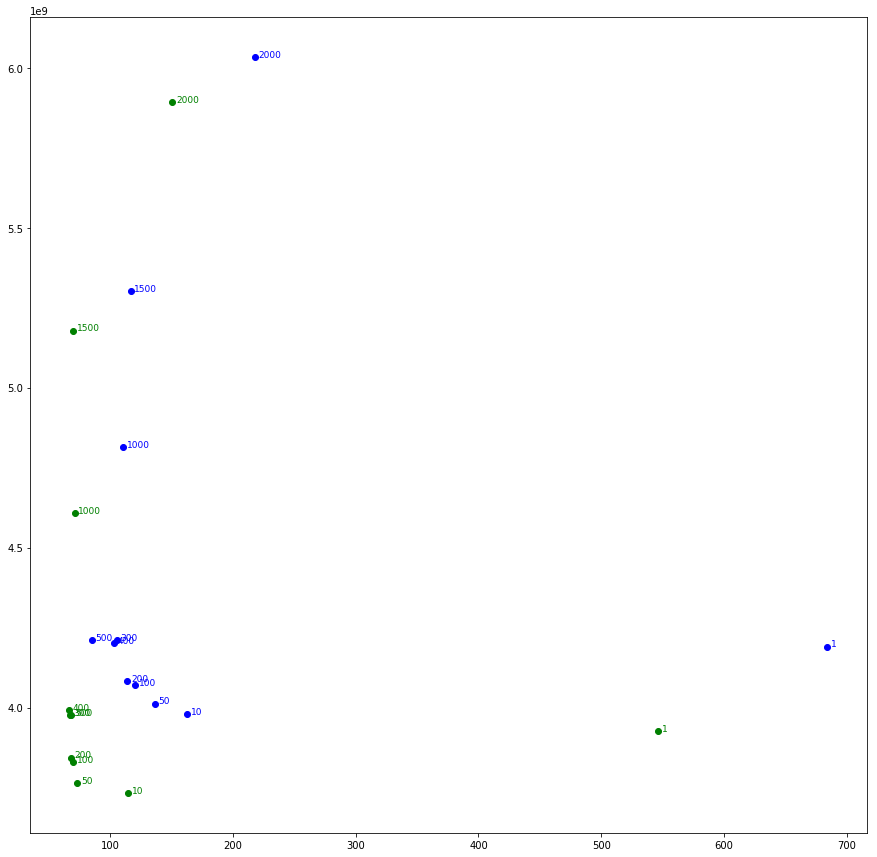

In [9]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
color_codes = {
    'only_one': 'green',
    'insulin': 'blue',
    'half': 'orange',
    'all': 'red'
}
for (selection, sel_perfs) in performances.items():
    for (chunk_size, time) in sel_perfs['time'].items():
        plt.scatter(time, sel_perfs['memory'][chunk_size], marker='o', color=color_codes[selection],label=selection)
        plt.text(time+3, sel_perfs['memory'][chunk_size], chunk_size, fontsize=9, color=color_codes[selection])
#legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show()
fig.savefig('benchmark_results' + datetime.datetime.now().strftime('%Y-%m-%dT%H-%M-%S') + '.png', dpi=fig.dpi)